**Brian Blaylock**  
**April 4, 2019**

# Explore Contingency Table and Fractions Skill Score
## Hovemoller Diagram

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import os
from matplotlib.path import Path

import matplotlib as mpl
#mpl.rcParams['figure.figsize'] = [15,15]
mpl.rcParams['figure.titlesize'] = 15
mpl.rcParams['figure.titleweight'] = 'bold'
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['axes.titlesize'] = 15
mpl.rcParams['lines.linewidth'] = 1.8
mpl.rcParams['grid.linewidth'] = .25
mpl.rcParams['figure.subplot.wspace'] = 0.15
mpl.rcParams['figure.subplot.hspace'] = 0.15
mpl.rcParams['legend.fontsize'] = 10
mpl.rcParams['legend.framealpha'] = .75
mpl.rcParams['legend.loc'] = 'best'
mpl.rcParams['savefig.bbox'] = 'tight'
mpl.rcParams['savefig.dpi'] = 100

In [2]:
import sys
sys.path.append('/uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v3')
from BB_maps.my_basemap import draw_HRRR_map, draw_centermap
from BB_HRRR.HRRR_Pando import get_hrrr_latlon, get_hrrr_variable
from BB_HRRR.GLM_and_HRRR.GLM_events_HRRR import get_GLM_HRRR_contingency_stats,\
                                                 hit_rate, \
                                                 false_alarm_ratio, \
                                                 gilbert_skill_score, \
                                                 proportion_correct, \
                                                 critical_success_index
from BB_HRRR.HRRR_paths import get_domains
from BB_GOES.get_GLM import get_GLM_file_nearesttime, accumulate_GLM_FAST

Create HRRR map.
loaded /uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v3/BB_maps/saved_map_objects/HRRR_lcc_c_2000.npy map from file
Forecasts [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
Generate domains and masks.
HRRR Area in meters squared: 16811840278558.668
West Area in meters squared: 4034896806752.7593
Central Area in meters squared: 4034896806752.766
East Area in meters squared: 4034896806752.762
Utah Area in meters squared: 219973261639.39685
Colorado Area in meters squared: 269906899003.7569
Texas Area in meters squared: 688270731111.2987
Florida Area in meters squared: 149996892486.02234
dict_keys(['HRRR', 'West', 'Central', 'East', 'Utah', 'Colorado', 'Texas', 'Florida'])


In [3]:
domains = get_domains(add_states=['UT', 'CO', 'TX', 'FL'])

HRRR Area in meters squared: 16811840278558.668
West Area in meters squared: 4034896806752.7593
Central Area in meters squared: 4034896806752.766
East Area in meters squared: 4034896806752.762
Utah Area in meters squared: 219973261639.39685
Colorado Area in meters squared: 269906899003.7569
Texas Area in meters squared: 688270731111.2987
Florida Area in meters squared: 149996892486.02234


In [14]:
def get_HRRR_GLM_stats_hov_by_month(DOMAIN, month):
    samples = []
    for hour in range(24):
        DIR = '/uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v3/BB_HRRR/GLM_and_HRRR/HRRR_GLM_contingency_table'
        FILE = '/%s/%s_2018_m%02d_h%02d.csv' % (DOMAIN, DOMAIN, month, hour)
        
        FLASH_DIR = '/uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v3/BB_HRRR/HRRR_GLM_hit_rate_data/'
        FLASH_FILE = '/GLM_in_HRRR_%s_2018_m%02d_h%02d.csv' % (DOMAIN, month, hour)
        
        mean_flashes = []
        mean_events = []
        mean_HR = []
        mean_FAR = []
        mean_GSS = []
        mean_CSS = []
        mean_A = []
        mean_B = []
        mean_C = []
        mean_D = []
        sample_sum = []
        if os.path.exists(DIR+FILE):
            data = np.genfromtxt(DIR+FILE, delimiter=',', names=True, dtype=None, encoding='UTF-8')
            
            try:
                flash_data = np.genfromtxt(FLASH_DIR+FLASH_FILE, delimiter=',', names=True, dtype=None, encoding='UTF-8')
            except:
                flash_data = {'GLM_FLASH_COUNT':[np.nan, np.nan, np.nan]}
            
            try:
                samples.append(len(data['DATE']))
            except:
                samples.append(1)
            #print(data['DATE'])
            
            for f in range(1,19):
                events = data['GLM_Event_COUNT']
                flashes = flash_data['GLM_FLASH_COUNT']
                                
                A = data['F%02d_A' % f]
                B = data['F%02d_B' % f]
                C = data['F%02d_C' % f]
                D = data['F%02d_D' % f]
                
                mean_events.append(np.nanmean(events))
                mean_flashes.append(np.nanmean(flashes))
                mean_HR.append(np.nanmean(hit_rate(A, B, C, D)))
                mean_FAR.append(np.nanmean(false_alarm_ratio(A, B, C, D)))
                mean_GSS.append(np.nanmean(gilbert_skill_score(A, B, C, D)))
                mean_CSS.append(np.nanmean(critical_success_index(A, B, C, D)))
                mean_A.append(np.nanmean(A))
                mean_B.append(np.nanmean(B))
                mean_C.append(np.nanmean(C))
                mean_D.append(np.nanmean(D))

            if hour == 0:
                mean_events_HOV = np.array(mean_events)
                mean_flashes_HOV = np.array(mean_flashes)
                mean_HR_HOV = np.array(mean_HR)
                mean_FAR_HOV = np.array(mean_FAR)
                mean_GSS_HOV = np.array(mean_GSS)
                mean_CSS_HOV = np.array(mean_CSS)
                mean_A_HOV = np.array(mean_A)
                mean_B_HOV = np.array(mean_B)
                mean_C_HOV = np.array(mean_C)
                mean_D_HOV = np.array(mean_D)
            else:
                mean_events_HOV = np.vstack([mean_events_HOV, mean_events])
                mean_flashes_HOV = np.vstack([mean_flashes_HOV, mean_flashes])
                mean_HR_HOV = np.vstack([mean_HR_HOV, mean_HR])
                mean_FAR_HOV = np.vstack([mean_FAR_HOV, mean_FAR])    
                mean_GSS_HOV = np.vstack([mean_GSS_HOV, mean_GSS])    
                mean_CSS_HOV = np.vstack([mean_CSS_HOV, mean_CSS])    
                mean_A_HOV = np.vstack([mean_A_HOV, mean_A])
                mean_B_HOV = np.vstack([mean_B_HOV, mean_B])
                mean_C_HOV = np.vstack([mean_C_HOV, mean_C])
                mean_D_HOV = np.vstack([mean_D_HOV, mean_D])
        else:
            samples.append(0)
            if hour == 0:
                mean_events_HOV = np.arange(1,19)*np.nan
                mean_flashes_HOV = np.arange(1,19)*np.nan
                mean_HR_HOV = np.arange(1,19)*np.nan
                mean_FAR_HOV = np.arange(1,19)*np.nan
                mean_GSS_HOV = np.arange(1,19)*np.nan
                mean_CSS_HOV = np.arange(1,19)*np.nan
                mean_A_HOV = np.arange(1,19)*np.nan
                mean_B_HOV = np.arange(1,19)*np.nan
                mean_C_HOV = np.arange(1,19)*np.nan
                mean_D_HOV = np.arange(1,19)*np.nan
            else:
                mean_events_HOV = np.vstack([mean_events_HOV, np.arange(1,19)*np.nan])
                mean_flashes_HOV = np.vstack([mean_flashes_HOV, np.arange(1,19)*np.nan])
                mean_HR_HOV = np.vstack([mean_HR_HOV, np.arange(1,19)*np.nan])
                mean_FAR_HOV = np.vstack([mean_FAR_HOV, np.arange(1,19)*np.nan])
                mean_GSS_HOV = np.vstack([mean_GSS_HOV, np.arange(1,19)*np.nan])
                mean_CSS_HOV = np.vstack([mean_CSS_HOV, np.arange(1,19)*np.nan])
                mean_A_HOV = np.vstack([mean_A_HOV, np.arange(1,19)*np.nan])
                mean_B_HOV = np.vstack([mean_B_HOV, np.arange(1,19)*np.nan])
                mean_C_HOV = np.vstack([mean_C_HOV, np.arange(1,19)*np.nan])
                mean_D_HOV = np.vstack([mean_D_HOV, np.arange(1,19)*np.nan])
                
    return {'Hit Rate': np.transpose(mean_HR_HOV),
            'False Alarm Ratio': np.transpose(mean_FAR_HOV),
            'Gilbert Skill Score': np.transpose(mean_GSS_HOV),
            'Critical Success Index': np.transpose(mean_CSS_HOV),
            'Hits': np.transpose(mean_A_HOV),
            'False Alarms': np.transpose(mean_B_HOV),
            'Misses': np.transpose(mean_C_HOV),
            'Correct Rejections': np.transpose(mean_D_HOV),
            'samples': samples,
            'events': mean_events_HOV,
            'flashes': mean_flashes_HOV
           }

Working on: HRRR


/uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v3/BB_wx_calcs/binary_events.py:152: RuntimeWarning: invalid value encountered in true_divide
  FAR = b/(a+b)
/uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v3/BB_wx_calcs/binary_events.py:125: RuntimeWarning: invalid value encountered in true_divide
  H = a/(a+c)
/uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v3/BB_wx_calcs/binary_events.py:226: RuntimeWarning: invalid value encountered in true_divide
  GSS = (a-a_r)/(a+b+c-a_r)
/uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v3/BB_wx_calcs/binary_events.py:196: RuntimeWarning: invalid value encountered in true_divide
  CSI = a/(a+b+c)


Working on: West
Working on: Central
Working on: East
Working on: Utah


/uufs/chpc.utah.edu/common/home/u0553130/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:47: RuntimeWarning: Mean of empty slice


Working on: Colorado


/uufs/chpc.utah.edu/common/home/u0553130/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:45: RuntimeWarning: Mean of empty slice


Working on: Florida
Working on: Texas


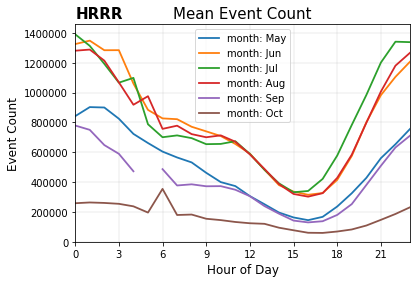

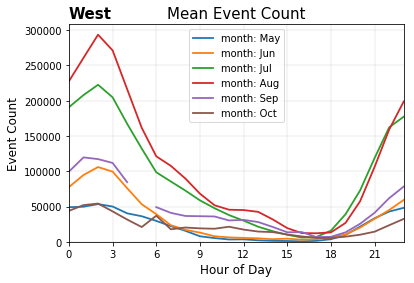

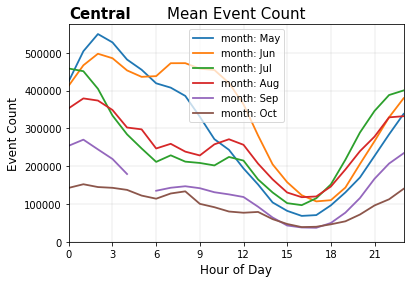

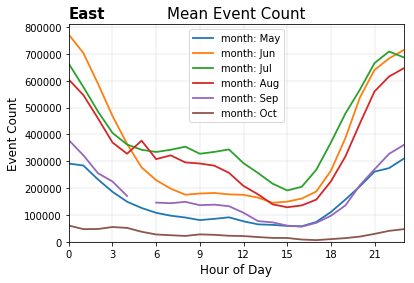

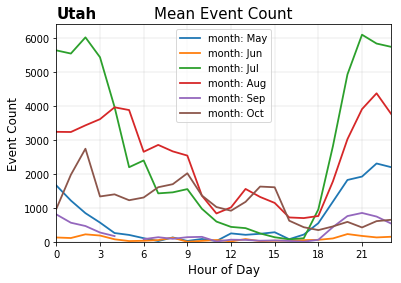

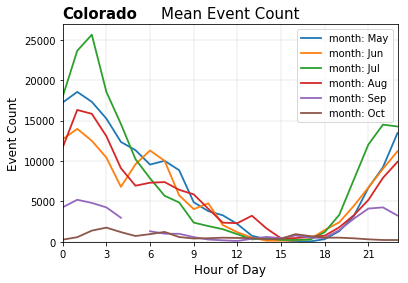

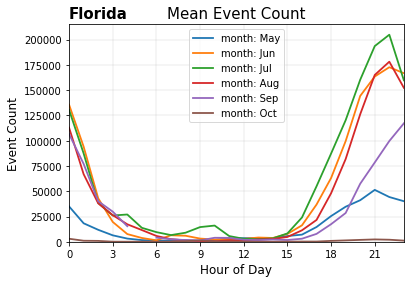

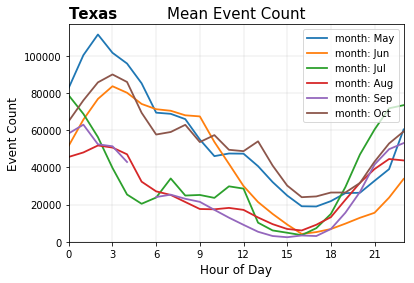

In [20]:
#for i, DOMAIN in enumerate(['HRRR']):
for i, DOMAIN in enumerate(['HRRR', 'West', 'Central', 'East', 'Utah', 'Colorado', 'Florida', 'Texas']):
    print('Working on:', DOMAIN)
    plt.figure(i+1)
    for m in range(5,11):
        events = get_HRRR_GLM_stats_hov_by_month(DOMAIN, m)['events'][:,0]
        if m == 9:
            events[5] = np.nan # Remove the 5th hour with lots of events
        plt.plot(events, label='month: %s' % datetime(2018, m, 1).strftime("%b"))
    plt.legend()
    plt.xticks(range(0,24,3));
    plt.title(DOMAIN, loc='left', fontweight='bold')
    plt.title('Mean Event Count')
    plt.xlabel('Hour of Day')
    plt.xlim([0,23])
    plt.ylim(ymin=0)
    plt.ylabel('Event Count')
    plt.grid()
    plt.savefig('./figs/Fig-XX_GLM-event-count-by-month-%s' % DOMAIN)

Working on: HRRR


/uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v3/BB_wx_calcs/binary_events.py:152: RuntimeWarning: invalid value encountered in true_divide
  FAR = b/(a+b)
/uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v3/BB_wx_calcs/binary_events.py:125: RuntimeWarning: invalid value encountered in true_divide
  H = a/(a+c)
/uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v3/BB_wx_calcs/binary_events.py:226: RuntimeWarning: invalid value encountered in true_divide
  GSS = (a-a_r)/(a+b+c-a_r)
/uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v3/BB_wx_calcs/binary_events.py:196: RuntimeWarning: invalid value encountered in true_divide
  CSI = a/(a+b+c)


Working on: West
Working on: Central
Working on: East
Working on: Utah


/uufs/chpc.utah.edu/common/home/u0553130/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:47: RuntimeWarning: Mean of empty slice


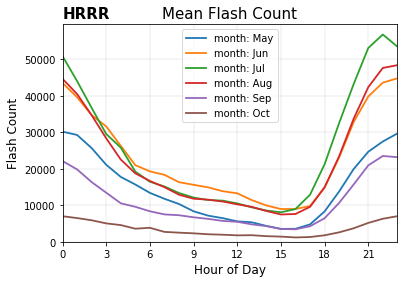

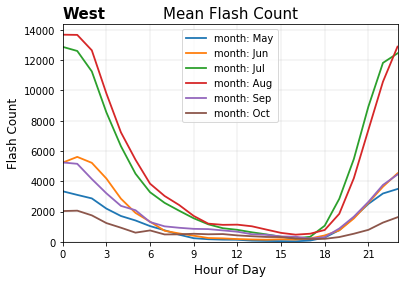

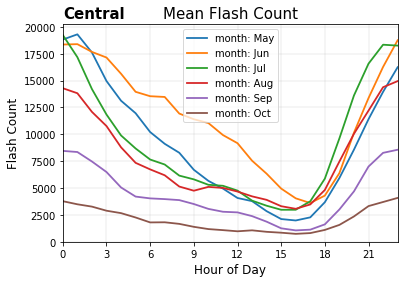

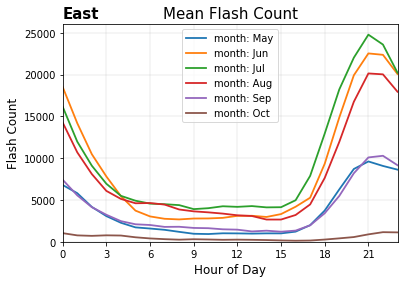

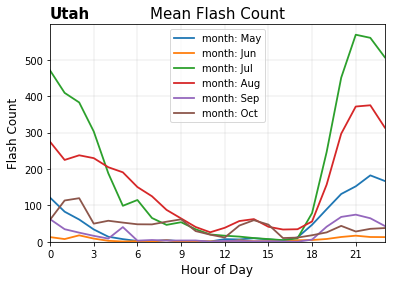

In [21]:
#for i, DOMAIN in enumerate(['HRRR']):
for i, DOMAIN in enumerate(['HRRR', 'West', 'Central', 'East', 'Utah']):
    print('Working on:', DOMAIN)
    plt.figure(i+1)
    for m in range(5,11):
        flashes = get_HRRR_GLM_stats_hov_by_month(DOMAIN, m)['flashes'][:,0]
        #if m == 9:
        #    events[5] = np.nan # Remove the 5th hour with lots of events
        plt.plot(flashes, label='month: %s' % datetime(2018, m, 1).strftime("%b"))
    plt.legend()
    plt.xticks(range(0,24,3));
    plt.title(DOMAIN, loc='left', fontweight='bold')
    plt.title('Mean Flash Count')
    plt.xlabel('Hour of Day')
    plt.xlim([0,23])
    plt.ylim(ymin=0)
    plt.ylabel('Flash Count')
    plt.grid()
    plt.savefig('./figs/Fig-XX_GLM-flashes-count-by-month-%s' % DOMAIN)